# Supervised Topic modelling :


This is a multi-class classification problem. The data input is the post title and content, the labels are the tag associated with it.
We downloaded tags that correspond to each stackOverflow post, so we can train supervised model to handle this.
The number of classes outputs is the number of different label present in the label corpus.

Preprocessing : as our corpus contains more than
As this is supervised learning, we have to assure that the training dataset is balanced and representative.

An interesting point here :"representative" dataset and "balanced" one can be contradictory whn the real word data is not balanced. For instance "python" tags is more likely to appear than "spacy" so the model might be biased towards python label. This will also change the cost function, as if the data is not balanced (one class in predominant for instance) the model will tend to be biased towrds this class. This false classification must be take care of during training.

preprocessing : to avoid the curse of dimensionality issue (as our word corpus is very large) we will use word-embedding representation technique.

We will use cross-validation for model evaluation. So we need to split our dataset into train/validation/test.

Different supervised model :

- GradientBoost
- One deep learning model

Three different neural network data peparation approach :
- Word2VEc
 - BERT
 - USE

 This 6 different global model will be compared and selected with ??? (acuracy ? ).
 The best supervised approach will be compared with supervised learning algorithm  through accuracy prediction ???


furthermore we will implement a dummy classifier to be sure that the model performs better that a simple approach (based on apperence frequency in the training set ) )

some articles specify that we can filter out features that scores low in information theory (information gain, Chi squared). So keep documennts word representation that is the most discriminative ones.

In [332]:
from gensim.models import Word2Vec
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import jaccard_score, average_precision_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [333]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [334]:
sto_corpus = np.load("/content/drive/MyDrive/OpenClassroom/corpus.npy",allow_pickle=True)
sto_titles = np.load("/content/drive/MyDrive/OpenClassroom/titles.npy",allow_pickle=True)
sto_corpus_tags = np.load("/content/drive/MyDrive/OpenClassroom/corpus_tags.npy",allow_pickle=True)

# Balanced or representative dataset  ?

In [335]:
sto_corpus = sto_corpus[:2000]
sto_titles = sto_titles[:2000]
sto_corpus_tags = sto_corpus_tags[:2000]

In [336]:
tags = []
for text_tags in sto_corpus_tags :
  for tag in text_tags :
      tags.append(tag)

In [337]:

tags_series = pd.Series(tags)

In [338]:
tags_series.value_counts().shape

(2140,)

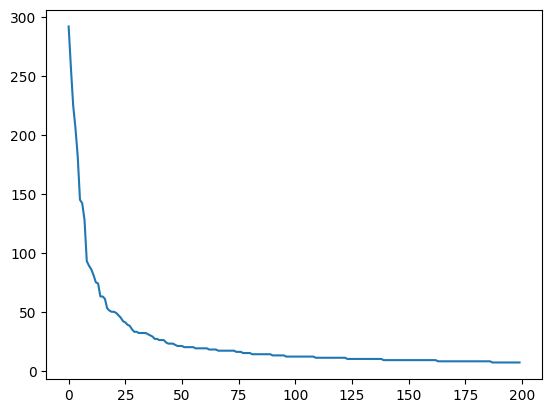

In [339]:
plt.plot(tags_series.value_counts().head(200).values)
plt.show()

# Number of classes = 30

In [340]:
labels = tags_series.value_counts().head(30)
labels

c#                292
java              257
c++               225
javascript        206
python            182
android           145
.net              142
ios               128
c                  93
php                89
html               86
performance        81
css                75
jquery             74
objective-c        63
sql                63
algorithm          61
linux              53
spring             51
asp.net            50
sql-server         50
multithreading     49
json               47
node.js            45
c++11              42
mysql              41
iphone             39
asp.net-mvc        38
arrays             35
spring-boot        33
dtype: int64

In [341]:
label_list = np.array(labels.index)

In [342]:
d = dict(zip(label_list, range(0,len(label_list))))

# The Multi-Label classification :

Mutlilabel classification is different form Multiclass classification.  In multiclass classification, each instance belong to a specific label, in multiclass calssification, a instance may belong to 0 or multiple class.

Here, each instance of our dataset has multiple labels. The prediction mutually non-exclusive.
We need a model that can predict zero or more class.

My first idea was to handle multilabel classification as multiclass classification. I generated a dataset repeating the instance for each tag labelled. This was not a good idea. Classifiation methods using one-vs-one or one-vs-rest ( based on Logistic regression or SVVM classifiers) where searching difference between data that could have actually the same label.

Therefore, I let the data be multi-label data.




issue mutilicall can be multiple labels ???
real data
text -> mutiple tags
if text - > 2 tags in labels :
text - > tag1
tes=xt - > tag2 in train /tests datasets.


In [343]:
def mutli_to_on_label(sto_corpus_tags, sto_corpus, sto_titles) :
  selected_corpus = []
  selected_titles = []
  Y = []
  for i in range(len(sto_corpus_tags)):
    for tag in sto_corpus_tags[i] :
      if tag in labels :
        selected_corpus.append(sto_corpus[i])
        selected_titles.append(sto_titles[i])
        Y.append(tag)


  return selected_corpus, selected_titles, Y

selected_corpus, selected_titles, Y = mutli_to_on_label(sto_corpus_tags, sto_corpus, sto_titles)
Y_n_depreciated  = [ d[tag] for tag in Y]

In [344]:
# multi-label classification
Y_n = []
for tags in sto_corpus_tags:
  dtags = [ d[tag] for tag in tags if tag in labels  ]
  Y_n.append(dtags )


In [345]:
print(len(sto_corpus_tags))
print(len(Y_n))

2000
2000


In [346]:
Y_n[:10]

[[8],
 [7, 14],
 [14],
 [3, 13, 12],
 [15, 20],
 [1, 18, 29],
 [7, 26],
 [0, 6],
 [7, 14],
 [5]]

## data and label  preparation  :
Use of pretrained word embeddings.

use either for data preparation of as first layer

## X_train, X_test, Y_train, Y_test slip

This is done before tfidf to avoid data leakage

In [347]:
from sklearn.model_selection import train_test_split

X_title_train, X_title_test, X_corpus_train, X_corpus_test, y_train, y_test = train_test_split(sto_titles, sto_corpus, Y_n, test_size=0.2, random_state=1)

In [372]:
np.save("/content/drive/MyDrive/OpenClassroom/X_title_train.npy", X_title_train, allow_pickle=True)
np.save("/content/drive/MyDrive/OpenClassroom/X_corpus_train.npy",X_corpus_train,   allow_pickle=True)
np.save("/content/drive/MyDrive/OpenClassroom/X_title_test.npy",  X_title_test, allow_pickle=True)
np.save("/content/drive/MyDrive/OpenClassroom/X_corpus_test.npy", X_corpus_train,   allow_pickle=True)
np.save("/content/drive/MyDrive/OpenClassroom/y_train.npy",       y_train, allow_pickle=True)
np.save("/content/drive/MyDrive/OpenClassroom/y_test.npy",        y_test,   allow_pickle=True)
np.save("/content/drive/MyDrive/OpenClassroom/label_list.npy",        label_list,   allow_pickle=True)


In [348]:
print( len(X_title_train) )
print( len(X_corpus_train) )
print( len(X_title_test) )
print( len(y_test)       )

1600
1600
400
400


In [349]:
y_test[:5]

[[1, 5], [8, 17], [2, 8, 11], [], [1]]

# TFIDF

In [350]:
def getTDF(corpus, dic ):
  """ retrun Term Document Frequency"""
  return  [ dic.doc2bow(text) for text in corpus]

In [351]:
# word count
import gensim
import gensim.corpora as corpora

id2word = corpora.Dictionary(X_corpus_train)
corpus = getTDF(X_corpus_train, id2word)
tfidf = gensim.models.TfidfModel(corpus)

tfidf_corpus = tfidf[getTDF(X_corpus_train, id2word)]
tfidf_title = tfidf[getTDF(X_title_train, id2word)]

In [352]:
X_train = [ np.append(X_title_train[i], X_corpus_train[i]) for i in range (len( X_title_train)) ]
tfidf_c_train = tfidf[getTDF(X_train, id2word)]

X_test = [ np.append(X_title_test[i], X_corpus_test[i]) for i in range (len( X_title_test)) ]
tfidf_c_t_test = tfidf[getTDF(X_test, id2word)]

In [353]:
print(len(tfidf_c_train) )
print(len(tfidf_c_t_test))

1600
400


# LSA

In [354]:
from scipy.sparse import csr_matrix

def tfidf_to_xsparse(tfidf_in, nb_lines, nb_cols)  :
  """Convert the TF-IDF corpus into a sparse matrix"""
  rows, cols, data = [], [], []
  for i, doc in enumerate(tfidf_in):
      for j, value in doc:
          rows.append(i)
          cols.append(j)
          data.append(value)
  return csr_matrix((data, (rows, cols)), shape=(nb_lines, nb_cols))



In [355]:
from sklearn.decomposition import TruncatedSVD
# TRAIN
X_sparse  = tfidf_to_xsparse(tfidf_c_train, len(tfidf_c_train), len(id2word) )

svd       = TruncatedSVD(n_components=1100, n_iter=7, random_state=33) # train LSA on train set
X_svd     = svd.fit_transform(X_sparse)

# apply PCA on test set
X_sparse_test  = tfidf_to_xsparse(tfidf_c_t_test, len(tfidf_c_t_test), len(id2word) )
X_svd_test     = svd.transform(X_sparse_test)

In [356]:
print(X_sparse.shape)
print(X_svd.shape)
print(X_sparse_test.shape)
print(X_svd_test.shape)

(1600, 40882)
(1600, 1100)
(400, 40882)
(400, 1100)


# Handling imbalanced dataset : undersampling

The under or over sampling should be done after train / test split so the test data is more representative.
There are different under sampling methods such as selecting the same number of random element per class but others are more intended to avoid information loss such as nearMiss using distances between classes.

In [357]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss()
# X_res, y_res = nm.fit_resample(X_svd, y_train)
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0, replacement=True)
# X_res, y_res = rus.fit_resample(X_svd, y_train)

X_res, y_res = X_svd, y_train

# Logistic regression : One VS Rest

In [358]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

mlb = MultiLabelBinarizer()
y_train_b = mlb.fit_transform(y_train)
y_test_b = mlb.transform(y_test)


model = MultiOutputClassifier(LogisticRegression(multi_class='ovr'))
model.fit(X_svd, y_train_b)

MultiOutputClassifier(estimator=LogisticRegression(multi_class='ovr'))

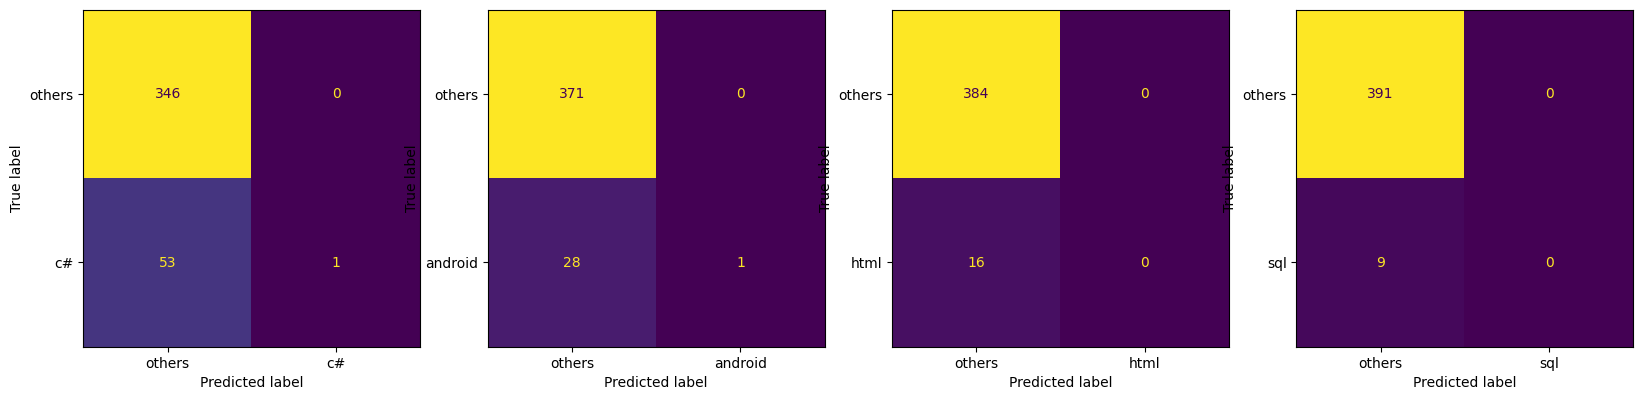

In [359]:
def plot_counf_matrix(y_test, y_pred, NB_LABEL = 4):

  fig, axs = plt.subplots(1,NB_LABEL, figsize=(NB_LABEL*5,5))
  for i in range(NB_LABEL) :
    rdm_label = i *5
    cm = multilabel_confusion_matrix(y_test, y_pred )[rdm_label]


    display_labels = ["others", label_list[rdm_label] ]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=display_labels)
    disp.plot(ax=axs[i],colorbar=False)

  plt.show()

yhat = model.predict(X_svd_test)
plot_counf_matrix(y_test_b, yhat)

[ True Negative , false positive] ,
[False negative, true positivve ]

In [360]:
X_test[0]

array(['Android', 'Bluetooth', 'connect', 'developing', 'us', 'Bluetooth',
       'connect', 'device', 'testing', 'Nexus', 'phone', 'never', 'able',
       'establish', 'serial', 'port', 'connection', 'phone', 'device',
       'able', 'connect', 'device', 'laptop', 'phone', 'equivalent',
       'PuTTY', 'exception', 'Bluetooth', 'File', 'Transfer',
       'Marketplace', 'think', 'us', 'keep', 'seeing', 'LogCat', 'log',
       'stopDiscoveryNative', 'StopDiscovery', 'org.bluez.Error.Failed',
       'Invalid', 'discovery', 'session', 'well', 'java.io.IOException',
       'Operation', 'Canceled', 'java.io.IOException', 'Software',
       'caused', 'connection', 'abort', 'UUID', 'Method',
       'device.getClass', '.getMethod', 'createRfcommSocket', 'Class',
       'int.class', 'sock', 'BluetoothSocket', 'm.invoke', 'device',
       'Integer.valueOf', 'instead',
       'device.createRfcommSocketToServiceRecord', 'UUID', 'well', 'luck',
       'BluetoothChat', 'variation', 'testing', 'Solut

In [361]:
prediction = model.predict(X_svd_test[0].reshape(1, -1))
prediction

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]])

## evaluation :    
average precision : summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold
jaccard similarity coefficient  : size of intersection divided by the size of the union

micro : to calculate the metric globally as it is multi-label case

In [362]:
precision_logistic = average_precision_score(y_test_b, yhat, average='micro')
jaccard_score_logistic = jaccard_score(y_test_b, yhat, average='micro')

## SVM : Support Vector Classification (SVC) one vs one

In [363]:
regressor = MultiOutputClassifier(svm.SVC(decision_function_shape='ovo',kernel='rbf'))
regressor.fit(X_svd, y_train_b)

MultiOutputClassifier(estimator=SVC(decision_function_shape='ovo'))

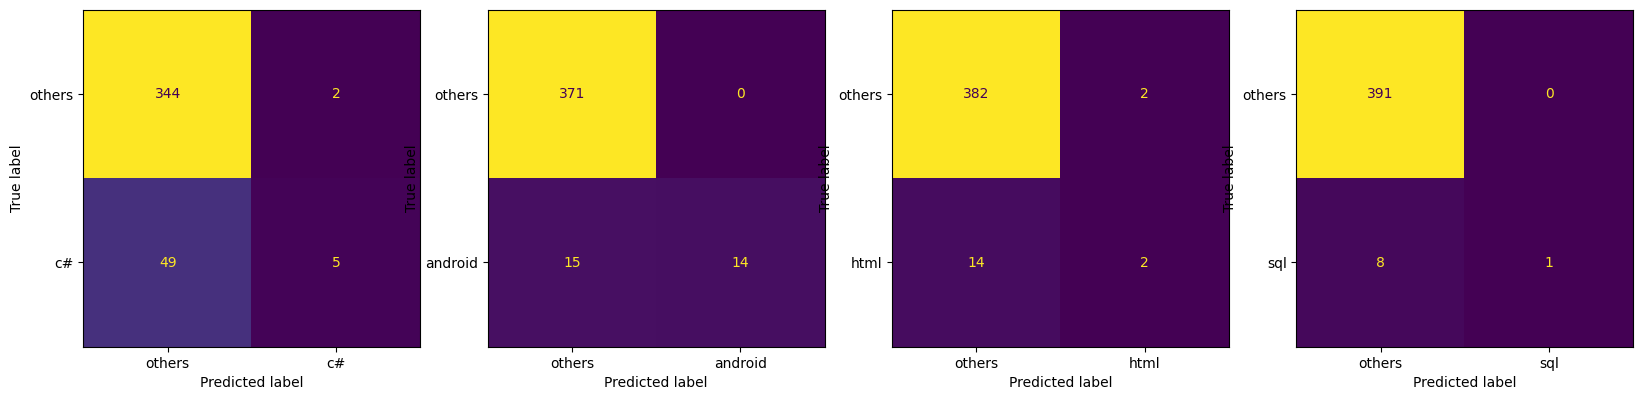

In [364]:
y_pred = regressor.predict(X_svd_test)
plot_counf_matrix(y_test_b, y_pred)

In [365]:

precision_svm = average_precision_score(y_test_b, y_pred, average='micro')
jaccard_score_svm = jaccard_score(y_test_b, y_pred, average='micro')

In [366]:
prediction = regressor.predict(X_svd_test[0].reshape(1, -1))
prediction

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]])

In [367]:
label_list[5]

'android'

# Random forest

## Consecutive grid-search for hyperparameters tunning :

In [369]:

n_estimators = [10, 50, 100] # number of trees in the random forest
max_depth = [2,5,10,20] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 10] # minimum sample number to split a node
min_samples_leaf = [1, 4] # minimum sample number that can be stored in a leaf node

first_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
grid_seach_rf =  GridSearchCV(rf,first_grid) #  default 5-fold cross validation,

grid_seach_rf.fit(X_svd, y_train_b)

print ('Random grid: ', grid_seach_rf, '\n')
print ('Best Parameters: ', grid_seach_rf.best_params_, ' \n')

KeyboardInterrupt: ignored

In [ ]:
fsege

In [ ]:
n_estimators = [5, 20, 50, 100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
## Importing Random Forest Classifier from the sklearn.ensemble

rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
fsvsfvb

In [ ]:
rf_random.fit(X_svd, y_train_b)

In [ ]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_svd, y_train_b)

In [ ]:
precision_rf      = average_precision_score(y_test_b, y_pred, average='micro')
jaccard_score_rf = jaccard_score(y_test_b, y_pred, average='micro')

In [ ]:
y_pred = rdf.predict(X_svd_test)
plot_counf_matrix(y_test_b, y_pred)

# Neural Networks

Multilayers perceptron (MLP) for multi-label classification

loss funstion : binary cross-entropy loss function

activation function : ReLU in the hidden layers

adam version of stochastic gradient descent

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# define the model
n_inputs = 1100 # LSA output
n_outputs = len(labels)

nn_model =keras.Sequential()
nn_model.add(layers.Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
nn_model.add(layers.Dense(n_outputs, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
nn_model.summary()

In [ ]:
nn_model.fit(X_svd,y_train_b, epochs=15, batch_size=30)

In [ ]:
y_pred.shape
y_test_b.shape

In [ ]:
y_pred[1]

In [ ]:
...
from sklearn.metrics import accuracy_score
# evaluate the keras model
y_pred = nn_model.predict(X_svd_test)
y_pred_nn = (y_pred > 0.1).astype(np.float32)

In [ ]:
plot_counf_matrix(y_test_b, y_pred_nn)

In [ ]:

print(classification_report(y_test_b, y_pred_nn, target_names=label_list, digits=4))

# the model is biased towards most represented class ???

## trainning using k-folds

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10,random_state=7, shuffle = True)


In [ ]:
for train, test in skf.get_n_splits(X_svd, y_train_b):
  train_evaluate(model, X[train], Y[train], X[test], Y[test])

# Handling padding in NLP  for the embedding ??? also if no prior LSA (only bag of words issue with paddin ?? ) :    
AS I will use neural networks, I need to have same inputs sizes. However the number of of words is not always the same, so padding is necessary.

In [ ]:
# generate own embedding


model = Word2Vec(sentences= X_train, vector_size = 100)
model.save("word2vec.model")


In [ ]:
model = gensim.models.Word2Vec.load("word2vec.model")
model.wv.similarity('splint','tableview')

In [ ]:
model.wv.most_similar(positive=["Python"])

In [ ]:
X_train_embedding = model.wv[X_train]

## model hyperparameter tunning with grid search

In [ ]:
#

# BERTopics

BERT : Bidirectinal Encoder Representations from Transformers
(only encoder part)

In [ ]:
!pip install bertopic
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings_corpus = model.encode(X_corpus_train, show_progress_bar=True)
embeddings_titles = model.encode(X_title_train, show_progress_bar=True)

In [ ]:



# Skip over dimensionality reduction, replace cluster model with classifier,
# and reduce frequent words while we are at it.
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)